# The performance of Luka Modrić during the FIFA World Cup 2018
*Inspired by the Friends of Tracking Academy*

## Report Objective
The national team of Croatia was the sensation of the FIFA World Cup 2018. They reached their first World Cup final and set their nation on fire. This success was directed by their captain Luca Modrić, who was awarded the best player of the tournament. In the Netherlands Luka is known as "de kleine dribbelaar" (the little dribbler). I want to find out how good of a dribbler he really is. To do this we will analyse event data made available by *StatsBomb*. But before we start, let's set the definition of a dribble? According to *StatsBomb* the definition of a successful dribble is "when a player with possession of the ball takes it past an opponent".

In this notebook I will take you through the analysis step-by-step. We will start by setting the Python environment and loading the event data in chapter 1. In chapter 2 we will look at Luka's stats and compare him to his teammates and the other top players in the World Cup. Finally, we will wrap this analysis up with a conclusion in chapter 3.

<img src="images/luka_modric_dribble_2.jpg" title="Luka Modrić in action during the FIFA World Cup 2018" style="width: 600px;" align="left"/>

## 1 - Importing packages and loading *StatsBomb* data
Let's start by setting the Python environment by importing the required packages and loading the *StatsBomb* event data.

<img src="data_statsbomb/stats-bomb-logo.png" title="StatsBomb logo" style="width: 250px;" align="center"/>

### 1.1 - Importing packages

Below the required packages are imported to analyse and visualize the data. Additionally, we will call upon the functions in *utils.py*. These functions are stored in this separate file to limit the amount of code in this notebook. Feel free to take a look at *utils.py*!

In [1]:
# Import packages
import os, json, math
import matplotlib.pyplot as plt, pandas as pd, numpy as np, ipywidgets as widgets, seaborn as sns
from tabulate import tabulate
from IPython.display import Image

# Import custom scripts from utils.py
from utils.basic_plots import *
from utils.load_json import *
from utils.advanced_plots import *
from utils.dataframe_mods import *

## 1.2 - Loading *StatsBomb* data
*StatsBomb* provides a lot of freely available event data. To load this data, we will go through seven (7) steps in which we subsequently load the **competition**, **match**, **line-up**, and **event** data. In this notebook we focus on the performance of Luka Modrić during the FIFA World Cup - 2018, however, if you are interested in a different competition, team or player, the opportunity is provided to change this in steps 2, 5, and 7.

Step 1: Load competition data

In [2]:
# Set path to data
path = f"{os.getcwd()}\\data_statsbomb\\data"

# Load competition data
comp_df = load_json(f"{path}\\competitions.json")

Step 2: Select competition of interest

In [3]:
# Create list of competitions to choose from
competitions = list(comp_df.competition_name + " - " + comp_df.season_name)

# Create drop down menu
select_competition = widgets.Dropdown(options=competitions, value="FIFA World Cup - 2018", description='Select competition:',
                                      style={'description_width':'initial'})
display(select_competition)

Dropdown(description='Select competition:', index=17, options=('Champions League - 2018/2019', 'Champions Leag…

Step 3: Load match data for competition of interest

In [4]:
# Determine the competition_id and season_id of the selected competition
competition = select_competition.value
competition_name, season_name = competition.split(" - ")
comp_id = comp_df.loc[(comp_df.competition_name==competition_name) & (comp_df.season_name==season_name)].competition_id.iloc[0]
season_id = comp_df.loc[(comp_df.competition_name==competition_name) & (comp_df.season_name==season_name)].season_id.iloc[0]

# Load match data
matches_df = load_json(f"{path}\\matches\\{comp_id}\\{season_id}.json")

Step 4: Load event data for competition of interest

In [5]:
# Load event data for selected competition
events_df = load_multiple_json(f"{path}\\events\\", df=matches_df, join_on="match_id")

Stop 5: Select team of interest

In [6]:
# Create list of teams to choose from
teams = pd.unique(matches_df[["home_team_home_team_name", "away_team_away_team_name"]].values.ravel())

# Set default team
if "Croatia" in teams:
    team_tag = "Croatia"
else:
    team_tag = None

# Create drop down menu
select_team = widgets.Dropdown(options=teams, value=team_tag, description='Select team:', style={'description_width':'initial'})
display(select_team)

Dropdown(description='Select team:', index=6, options=('Australia', 'Peru', 'Nigeria', 'Iceland', 'Serbia', 'B…

Step 6: Load lineup data for team of interest

In [7]:
# Filter matches for team of interest only
team = select_team.value
matches_df = matches_df[(matches_df["home_team_home_team_name"]==team) | (matches_df["away_team_away_team_name"]==team)]

# lineup data for matches
lineups_df = load_multiple_json(f"{path}\\lineups\\", df=matches_df, join_on="match_id")

Step 7: Select player of interest

In [8]:
# Create list of player to choose from
lineups = lineups_df[lineups_df.team_name == team].lineup
players = set([player["player_name"] for lineup in lineups for player in lineup])

# Set default player
if "Luka Modrić" in players:
    player_tag = "Luka Modrić"
else:
    player_tag = None

# Create drop down menu
select_player = widgets.Dropdown(options=players, value=player_tag, description='Select player:', style={'description_width': 'initial'})
display(select_player)

Dropdown(description='Select player:', index=18, options=('Lovre Kalinić', 'Mario Mandžukić', 'Danijel Subašić…

## 2 - Performance analysis

In this chapter we will analyse the performance of Luka Modrić, and especially his dribbles. At first, we will focus on Luka himself, thereafter, we will compare his dribbles to those of his teammates, and finally, we will compare him the other top players of the World Cup.

### 2.1 - General statistics
Before diving into Luka's dribbles we'll investigate some general event stats, starting with the most performed events by Luka.

In [9]:
# Select player events
player = select_player.value
player_events_df = events_df[events_df.player_name == player]

# Print number of matches played by team, player and player positions
print(f"\n{team} played {len(matches_df)} matches during the {competition}.\n{player} participated in \
{len(player_events_df.match_id.unique())} of these matches and played the following position(s):\n")
print(tabulate([[pp] for pp in player_events_df.position_name.unique()], headers=["Position(s)"], tablefmt='pipe'))


Croatia played 7 matches during the FIFA World Cup - 2018.
Luka Modrić participated in 7 of these matches and played the following position(s):

| Position(s)               |
|:--------------------------|
| Right Center Midfield     |
| Left Defensive Midfield   |
| Center Attacking Midfield |
| Right Defensive Midfield  |
| Right Midfield            |
| Right Attacking Midfield  |


To see if Luka kept to his assigned role, we can plot a heat map to show the locations where he performed his events.

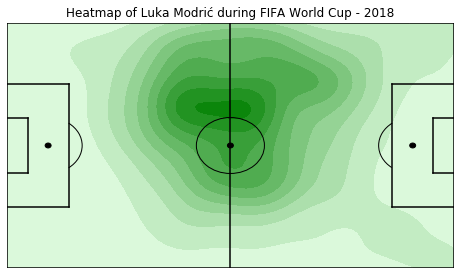

In [10]:
fig = plt.figure(figsize=(8, 4.5))
ax = plt.subplot()
create_heat_map(events=player_events_df, match=competition, fig=fig, ax=ax)
plt.show()

The heat map shows that he is most active around the centre circle, which can be expected from a midfielder. But what kind of events did he perform there? Below his top 6 most performed events are shown.

In [11]:
player_events_df.groupby('type_name')["player_name"].value_counts().unstack().sort_values(player, ascending=False).head(6)

player_name,Luka Modrić
type_name,
Pass,527
Ball Receipt*,448
Carry,425
Pressure,121
Ball Recovery,49
Dribble,19


This table shows that Luka performed an astonishing number of 527 passes and 425 carries in 7 matches. Below the passes and carries are broken down per match.

In [12]:
# Count number of passes and carries and get positions
pass_and_carry = player_events_df[player_events_df.type_name.isin(["Pass", "Carry"])].groupby(['match_id', 'type_name']).size().unstack()
goals = player_events_df.groupby("match_id")["shot_outcome_name"].value_counts().unstack()
positions = pd.DataFrame(player_events_df.groupby('match_id')['position_name'].apply(set))

# Create match name (home team vs away team) and add to summary
matches_df["match_name"] = matches_df.home_team_home_team_name + " vs " + matches_df.away_team_away_team_name

# Combine
summary = pass_and_carry.join(goals["Goal"]).fillna(0)
summary.insert(0, "match_name", matches_df.set_index("match_id").loc[summary.index].match_name)
summary.insert(4, "position_name", positions.loc[summary.index].position_name)
summary

,match_name,Carry,Pass,Goal,position_name
match_id,,,,,
7529,Croatia vs Nigeria,55,69,1.0,"{Right Center Midfield, Center Attacking Midfi..."
7545,Argentina vs Croatia,30,44,1.0,{Right Center Midfield}
7561,Iceland vs Croatia,53,58,0.0,{Right Center Midfield}
7581,Croatia vs Denmark,79,91,1.0,"{Left Defensive Midfield, Right Center Midfield}"
8652,Russia vs Croatia,94,110,1.0,"{Right Midfield, Right Defensive Midfield}"
8656,Croatia vs England,58,78,0.0,{Right Attacking Midfield}
8658,France vs Croatia,56,77,0.0,{Right Center Midfield}


As we can see, Luka was especially active during the match against Russia. To gain more insight in his style of play let's plot his passes and carries.

In [13]:
# Create list of matches to choose from
matches = list(matches_df.home_team_home_team_name + " vs " + matches_df.away_team_away_team_name) + ["All"]

# Set default match
if "Croatia vs England" in matches:
    match_tag = "Russia vs Croatia"
else:
    match_tag = None

# Create drop down menu
select_match = widgets.Dropdown(options=matches, value=match_tag, description='Choose match:', 
                                style={'description_width':'initial'})
display(select_match)

Dropdown(description='Choose match:', index=3, options=('Croatia vs Denmark', 'Croatia vs Nigeria', 'Argentina…

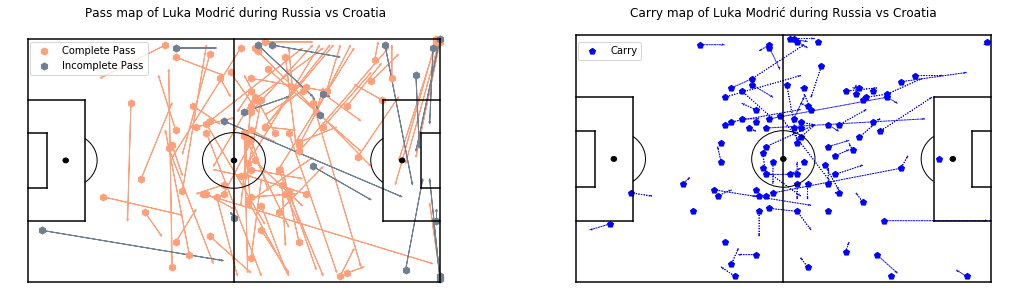

In [14]:
# Filter events for selected match
match = select_match.value
if match != "All":
    home_team, away_team = match.split(" vs ")
    match_id = matches_df[(matches_df.home_team_home_team_name==home_team) &
                          (matches_df.away_team_away_team_name==away_team)].match_id.iloc[0]    
    events_to_plot = player_events_df[player_events_df.match_id==match_id]
else:
    events_to_plot = player_events_df
    
# Set dimensions of pitch
pitch_length = 120  # yards * 0.9144 = meters
pitch_width = 80    # yards * 0.9144 = meters

# Initialize figure
fig = plt.figure(figsize=(18, 5))

# Draw pass map
ax1 = fig.add_subplot(1,2,1)
create_event_map(events_to_plot[events_to_plot.type_name=="Pass"],fig,ax1)
plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=1, loc='upper left')
plt.title(f'Pass map of {events_to_plot.player_name.unique()[0]} during {match}')

# Draw carry map
ax2 = fig.add_subplot(1,2,2)
create_event_map(events_to_plot[events_to_plot.type_name=="Carry"],fig,ax2)
plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=2, loc='upper left')
plt.title(f'Carry map of {events_to_plot.player_name.unique()[0]} during {match}')
plt.show()

The maps above show that most of Luka's passes and dribbles are forward oriented, but he doesn't carry much or send many passes into the box (besides his corners). We can also see that most of his passes are directed to the flanks and his carries are mostly around the centre circel.

One thing that I found particularly interesting when looking at all his matches, is that most of his passes ending up inside the box are unsuccessful. Although, most of them are corners and therefore relatively easy to intercept by the opposition, but still. Below all his passes and carries for the World Cup are shown.

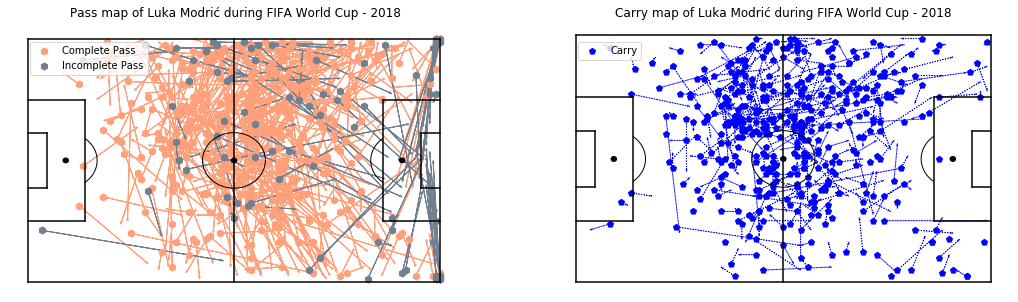

In [15]:
# Initialize figure
fig = plt.figure(figsize=(18, 5))

# Draw pass map
ax1 = fig.add_subplot(1,2,1)
create_event_map(player_events_df[player_events_df.type_name=="Pass"],fig,ax1)
plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=1, loc='upper left')
plt.title(f'Pass map of {player_events_df.player_name.unique()[0]} during {competition}')

# Draw carry map
ax2 = fig.add_subplot(1,2,2)
create_event_map(player_events_df[player_events_df.type_name=="Carry"],fig,ax2)
plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=2, loc='upper left')
plt.title(f'Carry map of {player_events_df.player_name.unique()[0]} during {competition}')
plt.show()

To conclude the general stats, we will plot the shots and goals by Luka. Below we can see that he scored 1 time from outside the penalty area and the other 3 times from the penalty spot.

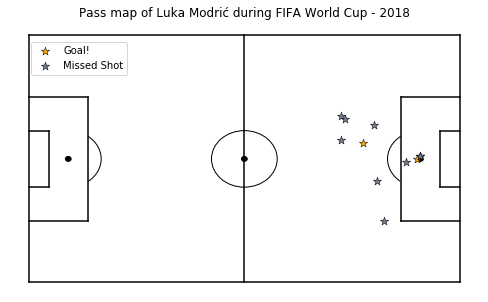

In [16]:
# Initialize figure
fig = plt.figure(figsize=(8.5, 5))

# Draw pass map
ax1 = fig.add_subplot()
create_event_map(player_events_df[player_events_df.type_name.isin(["Shot"])],fig,ax1)
plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=1, loc='upper left')
plt.title(f'Pass map of {player_events_df.player_name.unique()[0]} during {competition}')
plt.show()

### 2.2 - Luka's dribbles
Enough on the general stats, it is time to focus on Luka's dribbles, which, with 19 dribbles, is his #6 most performed event. One of the most important aspects of a dribble if it is completed or not, i.e. if he successfully took the ball past his opponent. The table below shows that 16 of his dribbles were successful and 3 were not, which results in an acceptable success rate of 84%.

In [17]:
# Print dribble overview
get_dribble_info(data= player_events_df, sort_by="Complete")

Index,player_name,Total dribbles,Complete,Incomplete,Success rate,Matches played,Dribbles per match
0,Luka Modrić,19,16,3,0.84,7,2.7


Besides a dribble being successful or not, it is interesting to see what he did with the ball after a successful dribble. Therefore, we will plot a dribble map, which shows a sequence of five events, the two events before the dribble, the dribble itself, and, only if successful, the two events after the dribble.

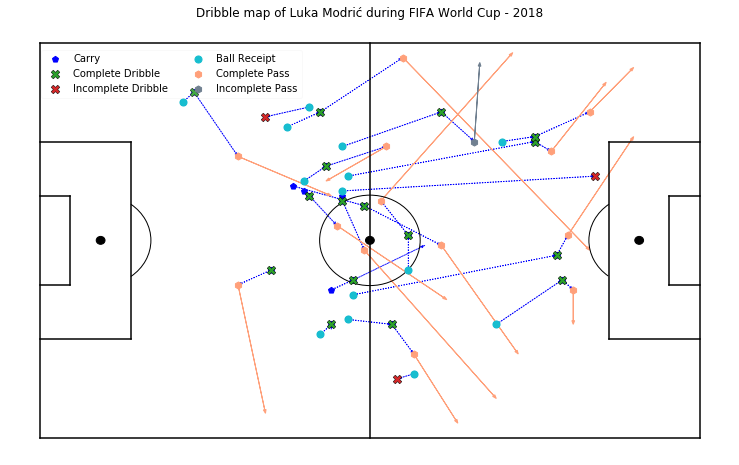

In [18]:
# Filter events of interest
map_index = dribble_map_index(df=player_events_df, player=player, event="Dribble")
plot_events = player_events_df.apply(lambda x: x[map_index])

# Create figure
fig = plt.figure(figsize=(13, 8))
ax = plt.subplot()

# Plot events
create_event_map(plot_events, fig, ax)
plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=2, loc='upper left', framealpha=0.1)
plt.title(f'Dribble map of {plot_events.player_name.unique()[0]} during {competition}')
plt.show()

The plot above shows that after his successful dribbles, he carried the ball a bit further and then passed to a teammate. As we mentioned before, most of these passes are directed towards the flanks.

### 2.3 - Comparing to his teammates
Now we have a basic idea of Luka's style and play, we can compare him to his team mates. In other words, is he the best dribbles in Croatia?

<img src="images/croatia.jpg" title="Croatia team for FIFA World Cup 2018" style="width: 750px;" align="left"/>

In [19]:
# Filter team events
team_events_df = events_df[events_df.player_name.isin(players)]

# Calculate dribles and success rate
team_dribbles = get_dribble_info(data= team_events_df, sort_by="Complete")
team_dribbles.head(5)

Index,player_name,Total dribbles,Complete,Incomplete,Success rate,Matches played,Dribbles per match,Success rate ranking,Dribbles per match ranking
0,Ante Rebić,22.0,19.0,3.0,0.86,6,3.7,1.0,1.0
1,Luka Modrić,19.0,16.0,3.0,0.84,7,2.7,2.0,2.0
2,Josip Pivarić,9.0,7.0,2.0,0.78,4,2.2,3.0,3.0
3,Andrej Kramarić,10.0,6.0,4.0,0.60,7,1.4,5.5,6.0
4,Ivan Rakitić,10.0,6.0,4.0,0.60,7,1.4,5.5,6.0


Ah! As it turns out, Ante Rebić has performed more dribbles and has a 2% higher success rate. Before we have a look at his dribble map let's see what positions he played.

In [24]:
events_filtered = events_df[events_df.player_name==team_dribbles.player_name[0]]
print(tabulate([[pp] for pp in events_filtered.position_name.unique()], headers=["Position(s)"], tablefmt='pipe'))

| Position(s)          |
|:---------------------|
| Right Midfield       |
| Right Center Forward |
| Left Wing            |
| Right Wing           |
| Center Forward       |


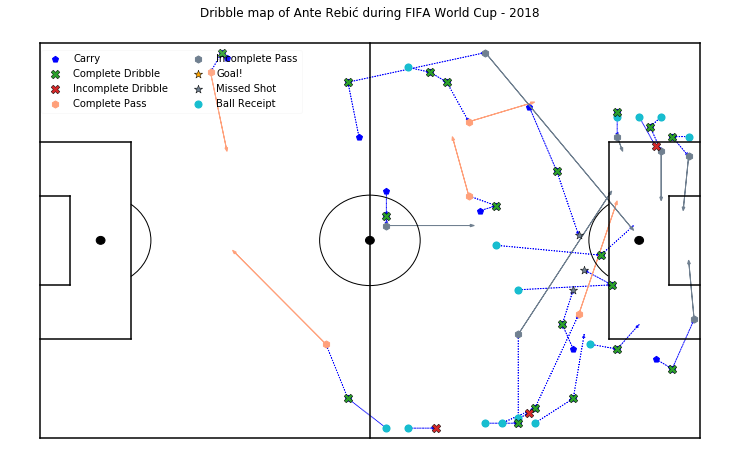

In [25]:
# Filter events of interest
name = team_dribbles.iloc[0].player_name
events_filtered = events_df[events_df.player_name == name]

map_index = dribble_map_index(df=events_filtered, player=name, event="Dribble")
plot_events = events_filtered.apply(lambda x: x[map_index])

# Create figure
fig = plt.figure(figsize=(13, 8))
ax = plt.subplot()

# Plot events
create_event_map(plot_events, fig, ax)
plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=2, loc='upper left', framealpha=0.1)
plt.title(f'Dribble map of {plot_events.player_name.unique()[0]} during {competition}')
plt.show()

The dribble map of Rebić shows that he is a dangerous attacker and likes to take on his opponent close to the opposition's penalty area. When his dribble is successful, and he ends up just outside the penalty area and right in front of the goal, he tends to shoot. But when his dribble takes him into the penalty area and sideways from the goal, he passes the ball, usually unsuccessfully.

In conclusion, Luka is not Croatia's player with the most dribbles, he is #2. But once he successfully takes on his opponent, he sends a successful pass almost every time. This in contrast to #1 Rebić, whose successive passes and shots are mostly intercepted or missed. So, in my opinion Luka lives up to his name of "kleine dribbelaar", for now. But we have to see if he upholds his name among the great of the earth.

### 2.4 - Comparing to the other star players
Now let us investigate how Luka performs compared to the other star players of the FIFA World Cup - 2018.

<img src="images/top-players.jpg" title="Top players of the FIFA World Cup 2018" style="width: 750px;" align="left"/>

Again, we will start with a table, this time showing the top 10 players with the most dribbles.

In [26]:
# Calculate dribles and success rate
top_dribbles = get_dribble_info(data=events_df, sort_by="Total dribbles")
top_dribbles.head(10)

Index,player_name,Total dribbles,Complete,Incomplete,Success rate,Matches played,Dribbles per match,Success rate ranking,Dribbles per match ranking
0,Kylian Mbappé Lottin,52.0,29.0,23.0,0.56,7,7.4,133.5,4.0
1,Neymar da Silva Santos Junior,43.0,29.0,14.0,0.67,5,8.6,80.5,3.0
2,Eden Hazard,42.0,28.0,14.0,0.67,6,7.0,80.5,5.5
3,Francisco Román Alarcón Suárez,41.0,30.0,11.0,0.73,4,10.2,46.5,2.0
4,Lionel Andrés Messi Cuccittini,28.0,21.0,7.0,0.75,4,7.0,37.0,5.5
5,Hirving Rodrigo Lozano Bahena,24.0,14.0,10.0,0.58,4,6.0,126.0,9.0
6,Raheem Shaquille Sterling,23.0,13.0,10.0,0.57,6,3.8,129.0,32.5
7,Ante Rebić,22.0,19.0,3.0,0.86,6,3.7,8.0,36.5
8,Héctor Miguel Herrera López,20.0,11.0,9.0,0.55,4,5.0,138.0,16.0
9,Luka Modrić,19.0,16.0,3.0,0.84,7,2.7,12.0,67.0


Here we see an impressive list with names as Mbappé, Neymar, Hazard, Messi, and ... Francisco Román Alarcón Suárez? That name didn't ring a bell, so I googled him, and it turns out to be the legendary Isco! Furthermore, we see Ante Rebić and Luka, who is just within the top 10! Below the dribble maps for the top 5 are shown.

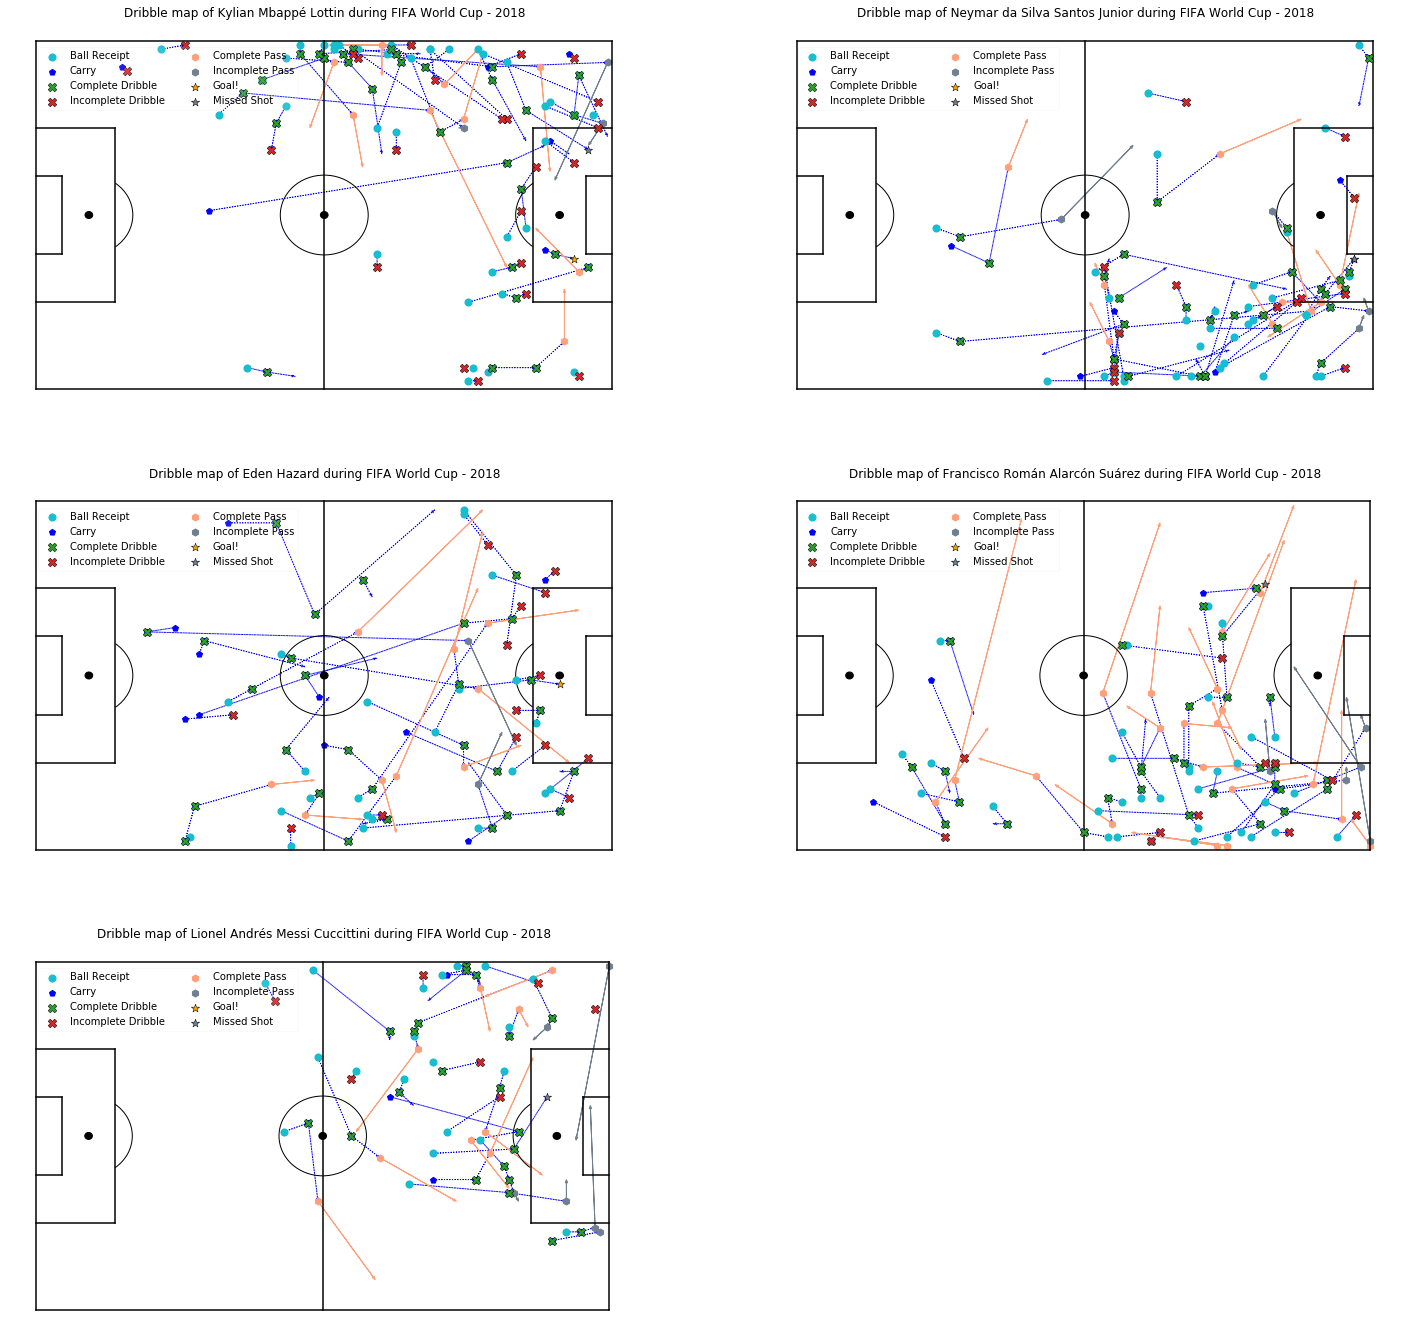

In [27]:
# Create figure
fig = plt.figure(figsize=(25, 24))

# Plot dribble map for top_n players
top_n = 5
rows, cols = [3, 2]

for i in range(top_n):
    name = top_dribbles.iloc[i].player_name
    events_filtered = events_df[events_df.player_name == name]
    map_index = dribble_map_index(df=events_filtered, player=name, event="Dribble")
    plot_events = events_filtered.apply(lambda x: x[map_index])

    # Plot events
    ax2 = plt.subplot(rows,cols,i+1)
    create_event_map(plot_events, fig, ax2)
    plt.legend(bbox_to_anchor=(0.04, 0.95), ncol=2, loc='upper left', framealpha=0.1)
    plt.title(f'Dribble map of {name} during {competition}')
plt.show()

The above plots show that Mbappé, Neymar and Isco operate from the flanks, while the dribbles of Hazard and Messi are more spread out over the pitch.

Anyway, back to Luka. To make it a bit easier to compare Luka to all these great players, we added two ranking columns the previous table. From these ranking columns we can see that, although Luka is nowhere near the top regarding the dribbles per match ranking, his success rate ranking is quit high compared to the other top dribblers. And if you would remove all players with less than 2.5 dribbles per match, Luka is the 6th most successful dribbler, see table below.

In [28]:
top_success = get_dribble_info(data=events_df, sort_by="Success rate ranking", ascending=True)
top_success[top_success["Dribbles per match"] > 2.5].head(10)

Index,player_name,Total dribbles,Complete,Incomplete,Success rate,Matches played,Dribbles per match,Success rate ranking,Dribbles per match ranking
1,Tom Rogić,9.0,8.0,1.0,0.89,3,3.0,2.0,54.0
2,Luis Jan Piers Advíncula Castrillón,8.0,7.0,1.0,0.88,3,2.7,4.0,67.0
3,Douglas Costa de Souza,8.0,7.0,1.0,0.88,2,4.0,4.0,26.5
8,Ante Rebić,22.0,19.0,3.0,0.86,6,3.7,8.0,36.5
10,Oghenekaro Etebo,13.0,11.0,2.0,0.85,3,4.3,11.0,20.0
11,Luka Modrić,19.0,16.0,3.0,0.84,7,2.7,12.0,67.0
15,Thiago Alcântara do Nascimento,6.0,5.0,1.0,0.83,2,3.0,15.5,54.0
23,Ruben Loftus-Cheek,15.0,12.0,3.0,0.80,4,3.8,23.0,32.5
25,Willian Borges da Silva,15.0,12.0,3.0,0.80,5,3.0,23.0,54.0
28,André Martín Carrillo Díaz,18.0,14.0,4.0,0.78,3,6.0,28.5,9.0


## 3 - Conclusion
In conclusion, Luka is one of the most successful dribblers of the FIFA World Cup - 2018, but he doesn't dribble that often. So, how come they call him "de kleine dribbelaar"? Therefore, we probably have to reconsider the definition of a dribbler. Although, the strict definition of a dribble is: "an attempt by a player to beat an opponent while maintaining possession of the ball", in practice someone who carries the ball often, even without encountering an opponent, might be referred to as a dribbler.

To back up this assumption we will have a look at the top 5 carriers of the World Cup.

In [29]:
events_df[events_df.type_name=="Carry"].groupby("player_name")["type_name"].count().sort_values(ascending=False).to_frame().rename(columns={"type_name":"nr_of_carries"}).head(5)

,nr_of_carries
player_name,
Francisco Román Alarcón Suárez,459
Luka Modrić,425
John Stones,400
Sergio Ramos García,390
Toby Alderweireld,372


Here we see that Luka performed the second most carries. But he also played all 7 possible matches up to the finals. To put Luka's carries in perspective we can use the plots below.

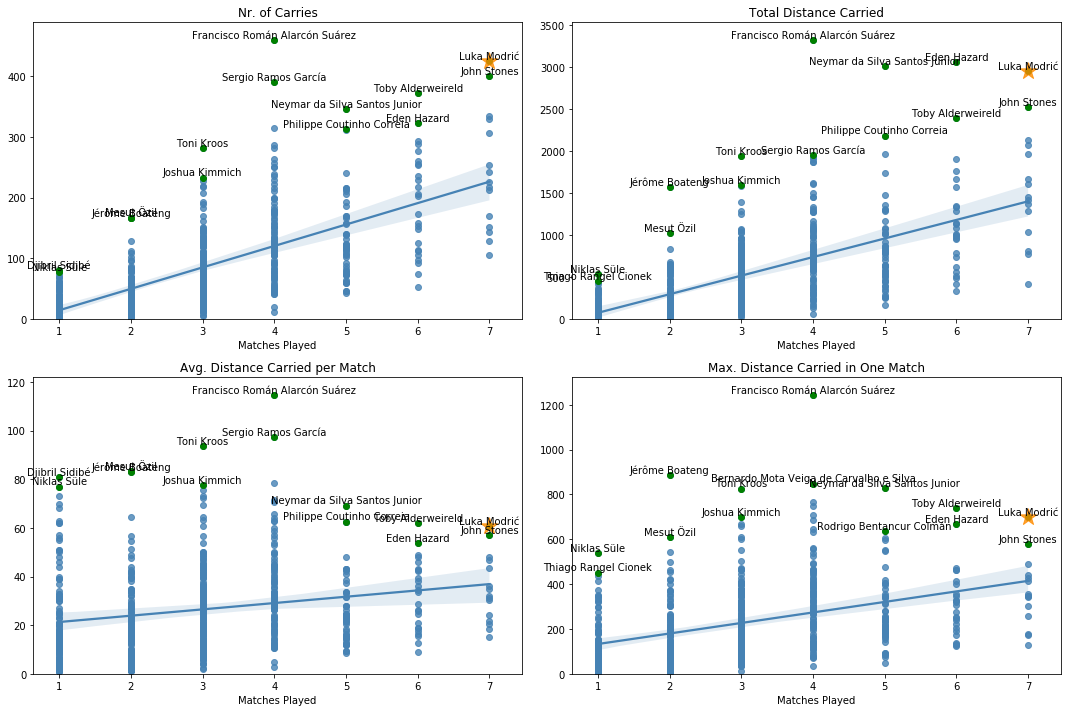

In [30]:
# Add carry information
events_df_grouped = add_carry_info(data=events_df)

# Plot performance of Modrić compared to his team mates
# Initialize figure
fig = plt.figure(figsize=(15, 10))

# Draw total number of carries
ax1 = fig.add_subplot(2,2,1)
fig, ax1 = create_extended_regplot(data=events_df_grouped, x="Matches Played", y="Nr. of Carries",
                                   top_n=2, player_to_highlight=player, fig=fig, ax=ax1)

# Draw total distance carried
ax2 = fig.add_subplot(2,2,2)
fig, ax2 = create_extended_regplot(data=events_df_grouped, x="Matches Played", y="Total Distance Carried",
                                   top_n=2, player_to_highlight=player, fig=fig, ax=ax2)

# Draw average distance carried
ax3 = fig.add_subplot(2,2,3)
fig, ax3 = create_extended_regplot(data=events_df_grouped, x="Matches Played", y="Avg. Distance per Match",
                                   top_n=2, player_to_highlight=player, fig=fig, ax=ax3)
ax3.set_title("Avg. Distance Carried per Match")

# Draw maximum distance carried during a single match
ax4 = fig.add_subplot(2,2,4)
fig, ax4 = create_extended_regplot(data=events_df_grouped, x="Matches Played", y="Max. Distance in One Match",
                                   top_n=2, player_to_highlight=player, fig=fig, ax=ax4)
ax4.set_title("Max. Distance Carried in One Match")

fig.tight_layout()

As we can see from these plots, Luka Modrić has the 2nd most carries and is the #4 when it comes to the total carried distance. He also is in the top when looking at the average and maximum. As you can imagine, this is probably an additional reason why people refer to him as "de kleine dribbelaar". And he fully deserves this title, especially when you keep in mind that he played 7 matches and just keeps on going!

It is too bad that Croatia did not win the finals, but for some consolation, Luka got crowned the best player of the tournament and in my opinion, he fully deserved it!

<img src="images/golden_ball.jpg" title="Luka Modrić crowned as the best player of the FIFA World Cup 2018" style="width: 600px;" align="left"/>

Thanks for reading this notebook, I hope you enjoyed it.

## Appendix

PS: maybe you noticed, but there is one player that beat Luka in carries and dribbles. This player only played four matches and even so beat Luka Modrić as top dribbler and in all four carry plots. Here he is again, the legendary Isco!

<img src="images/isco.jpg" title="Isco in action during the FIFA World Cup 2018" style="width: 300px;" align="left"/>